In [44]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained("gpt2", attn_implementation="eager")
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set to evaluation mode
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [80]:
data = np.load('../data/text_examples.npy')

In [81]:
data[0]

'Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses walk away from a field hospital Friday night after a Belgian medical team evacuated the area, saying it was concerned about security.\n\nThe decision left CNN Chief Medical Correspondent Sanjay Gupta as the only doctor at the hospital to get the patients through the night.\n\nCNN initially reported, based on conversations with some of the doctors, that the United Nations ordered the B'

In [47]:
model.config

GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "dtype": "float32",
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.57.3",
  "use_cache": true,
  "vocab_size": 50257
}

In [82]:
inputs = tokenizer(data[0], return_tensors="pt")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [87]:
print(*inputs)

input_ids attention_mask


In [99]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import torch.nn.functional as F

def generate_next_token(text, temperature=1.0):
    
    # Tokenize
    inputs = tokenizer(text, return_tensors="pt")
    
    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get logits for last token
    next_token_logits = outputs.logits[0, -1, :]
    
    # Apply temperature
    next_token_logits = next_token_logits / temperature
    
    # Convert to probabilities
    probs = F.softmax(next_token_logits, dim=-1)
    
    # Sample from distribution
    next_token_id = torch.multinomial(probs, num_samples=1)
    
    # Decode
    next_token = tokenizer.decode(next_token_id)
    
    return next_token, probs

# Generate word by word
prompt = data[2][:40]
generated = prompt

print(f"Starting with: '{prompt}'")
print("\nGenerating token by token:\n")

for i in range(10):  # Generate 10 tokens
    next_token, probs = generate_next_token(generated, temperature=1.5)
    generated += next_token
    print(f"Step {i+1}: + '{next_token}' → '{generated}'")

Starting with: 'The opinions expressed by columnists are'

Generating token by token:

Step 1: + ' their' → 'The opinions expressed by columnists are their'
Step 2: + ' own' → 'The opinions expressed by columnists are their own'
Step 3: + ' and' → 'The opinions expressed by columnists are their own and'
Step 4: + ' do' → 'The opinions expressed by columnists are their own and do'
Step 5: + ' not' → 'The opinions expressed by columnists are their own and do not'
Step 6: + ' represent' → 'The opinions expressed by columnists are their own and do not represent'
Step 7: + ' the' → 'The opinions expressed by columnists are their own and do not represent the'
Step 8: + ' views' → 'The opinions expressed by columnists are their own and do not represent the views'
Step 9: + ' of' → 'The opinions expressed by columnists are their own and do not represent the views of'
Step 10: + ' Town' → 'The opinions expressed by columnists are their own and do not represent the views of Town'


In [100]:
generated = prompt

# temperature = 0.01
for i in range(10):  # Generate 10 tokens
    next_token, probs = generate_next_token(generated, temperature=0.01)
    generated += next_token
    print(f"Step {i+1}: + '{next_token}' → '{generated}'")

Step 1: + ' their' → 'The opinions expressed by columnists are their'
Step 2: + ' own' → 'The opinions expressed by columnists are their own'
Step 3: + ' and' → 'The opinions expressed by columnists are their own and'
Step 4: + ' do' → 'The opinions expressed by columnists are their own and do'
Step 5: + ' not' → 'The opinions expressed by columnists are their own and do not'
Step 6: + ' represent' → 'The opinions expressed by columnists are their own and do not represent'
Step 7: + ' the' → 'The opinions expressed by columnists are their own and do not represent the'
Step 8: + ' views' → 'The opinions expressed by columnists are their own and do not represent the views'
Step 9: + ' of' → 'The opinions expressed by columnists are their own and do not represent the views of'
Step 10: + ' Town' → 'The opinions expressed by columnists are their own and do not represent the views of Town'


In [101]:
generated = prompt

for i in range(10):  # Generate 10 tokens
    next_token, probs = generate_next_token(generated, temperature=5)
    generated += next_token
    print(f"Step {i+1}: + '{next_token}' → '{generated}'")

Step 1: + ' Hive' → 'The opinions expressed by columnists are Hive'
Step 2: + ' Hills' → 'The opinions expressed by columnists are Hive Hills'
Step 3: + ' core' → 'The opinions expressed by columnists are Hive Hills core'
Step 4: + 'uria' → 'The opinions expressed by columnists are Hive Hills coreuria'
Step 5: + ' grizz' → 'The opinions expressed by columnists are Hive Hills coreuria grizz'
Step 6: + ' hooks' → 'The opinions expressed by columnists are Hive Hills coreuria grizz hooks'
Step 7: + ' security' → 'The opinions expressed by columnists are Hive Hills coreuria grizz hooks security'
Step 8: + 'erald' → 'The opinions expressed by columnists are Hive Hills coreuria grizz hooks securityerald'
Step 9: + 'tta' → 'The opinions expressed by columnists are Hive Hills coreuria grizz hooks securityeraldtta'
Step 10: + ' Keystone' → 'The opinions expressed by columnists are Hive Hills coreuria grizz hooks securityeraldtta Keystone'


In [102]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model.eval()

text = data[2][:40]
inputs = tokenizer(text, return_tensors="pt")

# Hook to capture activations
activations = {}

def get_activation(name):
    def hook(model, input, output):
        # Note: the detach here is because we don't want PyTorch to compute gradients on activations[name]
        activations[name] = output[0].detach()  # [0] because output is tuple
    return hook

# Register hook on layer 6 (middle layer)
layer_num = 6
handle = model.transformer.h[layer_num].register_forward_hook(
    get_activation(f'layer_{layer_num}')
)

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Remove hook
handle.remove()

# Examine activations
act = activations[f'layer_{layer_num}']
print(f"Activation shape: {act.shape}")
print(f"Explanation: (batch_size=1, seq_len={act.shape[1]}, hidden_dim={act.shape[2]})")

print(f"\nActivation for token 0 (first 10 dims):")
print(act[0, 0, :10])

print(f"\nActivation statistics:")
print(f"  Mean: {act.mean():.4f}")
print(f"  Std: {act.std():.4f}")
print(f"  Min: {act.min():.4f}")
print(f"  Max: {act.max():.4f}")

Activation shape: torch.Size([1, 7, 768])
Explanation: (batch_size=1, seq_len=7, hidden_dim=768)

Activation for token 0 (first 10 dims):
tensor([ 8.8385e-02, -1.4915e+00,  9.7487e-01,  6.0705e-02,  4.2908e-01,
        -3.9549e-01, -1.2095e+00, -7.5884e-01, -1.6469e+00,  1.2689e-03])

Activation statistics:
  Mean: 0.7151
  Std: 41.6655
  Min: -58.7025
  Max: 2941.2751


In [104]:
np.asarray(act[0]).shape

(7, 768)

In [105]:
import numpy as np
np.min(np.asarray(act[0]).reshape((56, 96)))

-58.702473

<Axes: >

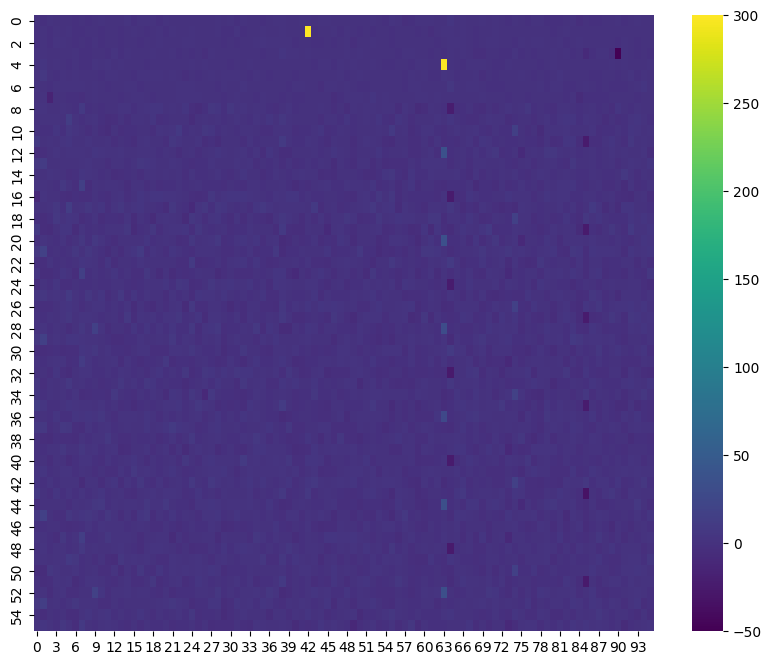

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.asarray(act[0]).reshape((56, 96)),vmin=-50, vmax=300, cmap="viridis")

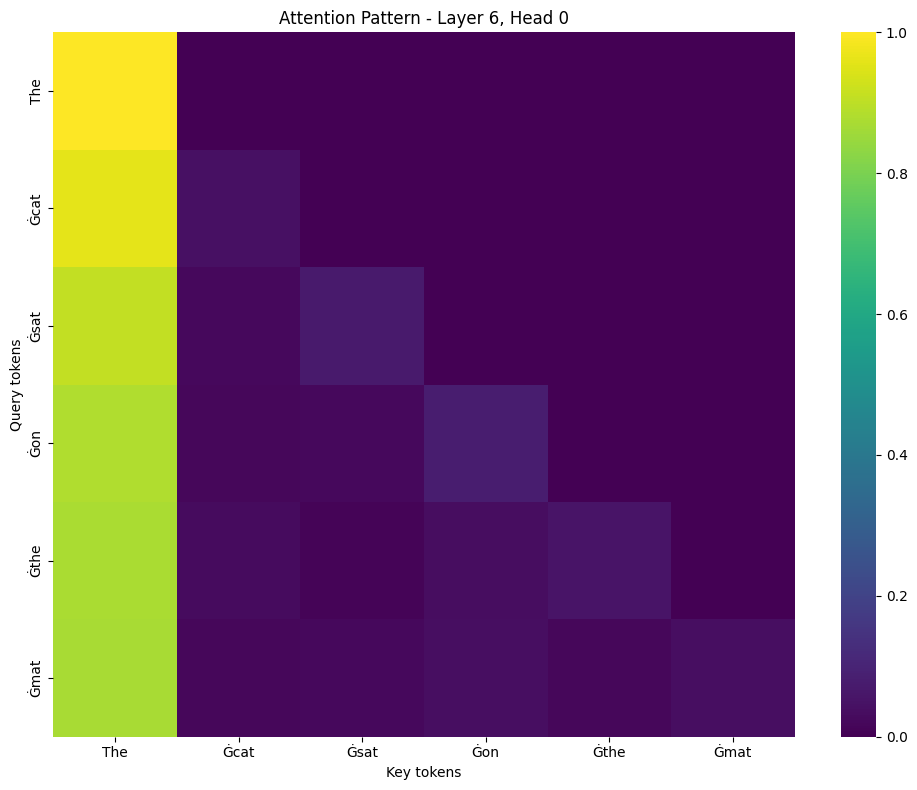

Attention heatmap saved!


In [61]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

text = "The cat sat on the mat"
inputs = tokenizer(text, return_tensors="pt")

# Get attention weights
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

# Get attention from layer 6, head 0
attention = outputs.attentions[6][0, 6].numpy()  # Shape: [seq_len, seq_len]

# Get tokens for labels
tokens = tokenizer.tokenize(text)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title("Attention Pattern - Layer 6, Head 0")
plt.xlabel("Key tokens")
plt.ylabel("Query tokens")
plt.tight_layout()
plt.show()

In [113]:
# Note: the shape is [1, 7, 768]
# 1 = batch size (we are currently just processing one sentence at a time)
# 7 = size of input string (GPT2 transforms each word into a vector representation)
# 768 = the length of each vector representation
activations['layer_6'].shape

torch.Size([1, 7, 768])